### Predict whether there's a forest fire
### Predict the size of the fire
### Which features are the best predictors
### Use the size of the fire to predict the other features
### Predict the factors for very large fires

In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv('forestfires.csv')

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [68]:
df.dtypes   

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [69]:
# Define the bin ranges
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, np.inf]

# Use pd.cut to create the bins and count the values in each bin
value_counts = pd.cut(df['area'], bins=bins).value_counts(sort=False)

# Print the value counts
print(value_counts)

area
(0.0, 10.0]       175
(10.0, 20.0]       36
(20.0, 30.0]       16
(30.0, 40.0]       12
(40.0, 50.0]        7
(50.0, 100.0]      13
(100.0, 200.0]      6
(200.0, 300.0]      3
(300.0, 400.0]      0
(400.0, 500.0]      0
(500.0, inf]        2
Name: count, dtype: int64


#### There is no wildfire standardized scaling system, so the fire sizes will probably be divided in small (=<10>) and large (>10).

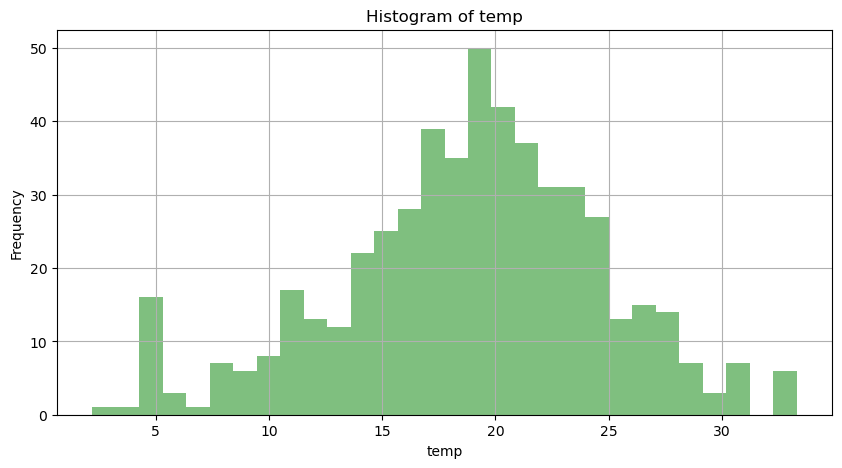

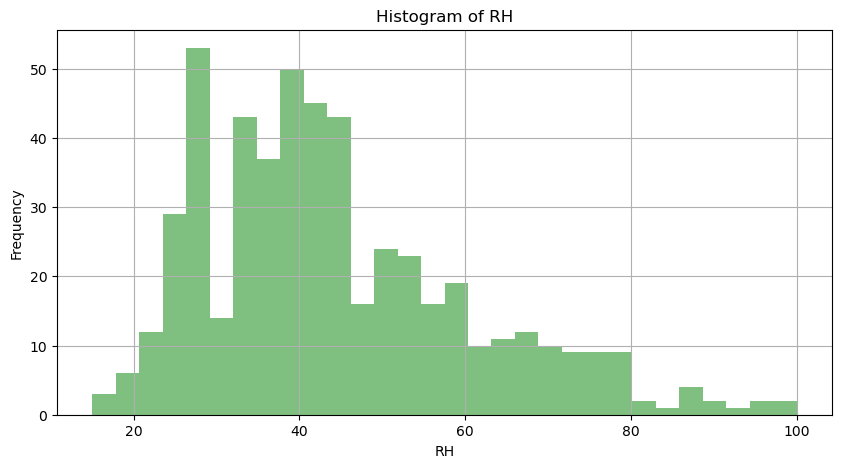

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'temp', 'RH'
variables = ['temp', 'RH']

for var in variables:
    plt.figure(figsize=(10,5))
    plt.hist(df[var], bins=30, alpha=0.5, color='g')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Relative Humidity (RH):

#### The distribution of relative humidity is somewhat right-skewed, with most values clustering between 20% and 60%.
#### The peak frequency of relative humidity values is around 30% to 40%.
#### There are fewer instances of extremely high relative humidity (above 80%).

### Temperature (temp):

#### The distribution of temperature is approximately normal, with most values clustering around the mean.
#### The peak frequency of temperature values is around 15°C to 20°C.
#### The temperature range extends from about 5°C to 30°C.

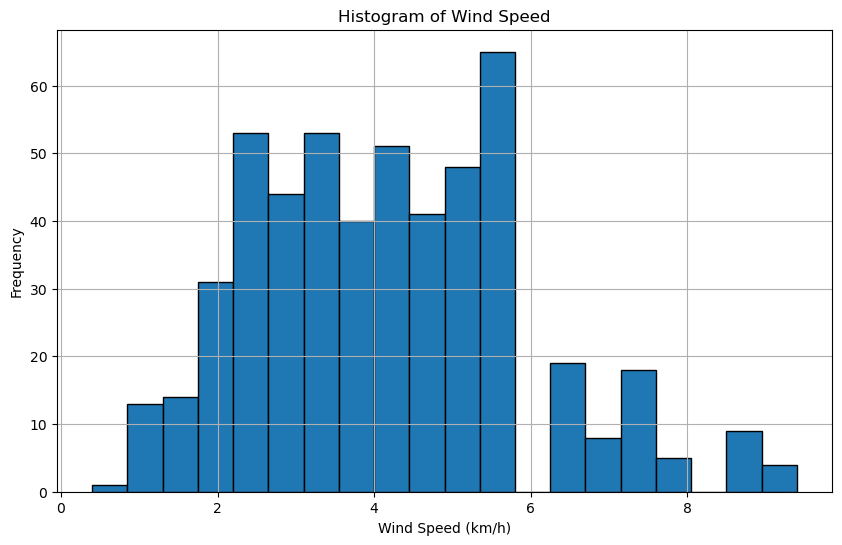

In [71]:
# Plot a histogram for the 'wind' variable
plt.figure(figsize=(10, 6))
plt.hist(df['wind'], bins=20, edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Distribution: The wind speeds are fairly uniformly distributed between 1 and 5 km/h, with a notable peak around 5 km/h.
#### Frequency: The most frequent wind speed appears to be around 5 km/h.
#### Outliers: There are fewer instances of wind speeds above 6 km/h, indicating potential outliers or less common wind speeds.

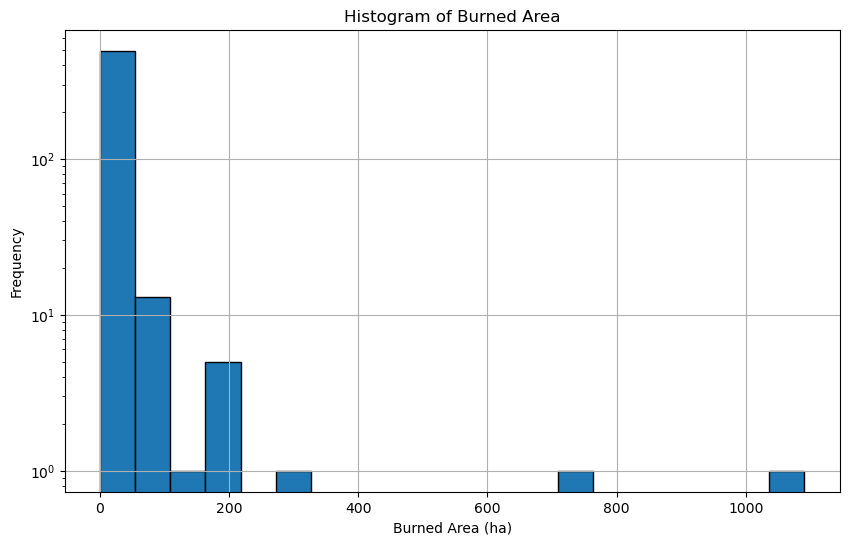

In [72]:
# Plot a histogram for the 'area' variable
plt.figure(figsize=(10, 6))
plt.hist(df['area'], bins=20, edgecolor='black')
plt.title('Histogram of Burned Area')
plt.xlabel('Burned Area (ha)')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a logarithmic scale for the y-axis due to the skewness of the data
plt.grid(True)
plt.show()

#### Most fires result in a very small burned area.
#### There are a few significant outliers where the burned area is very large.

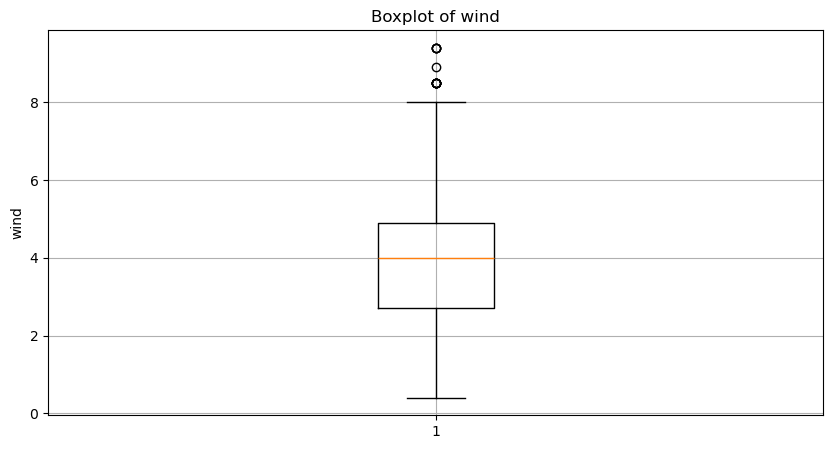

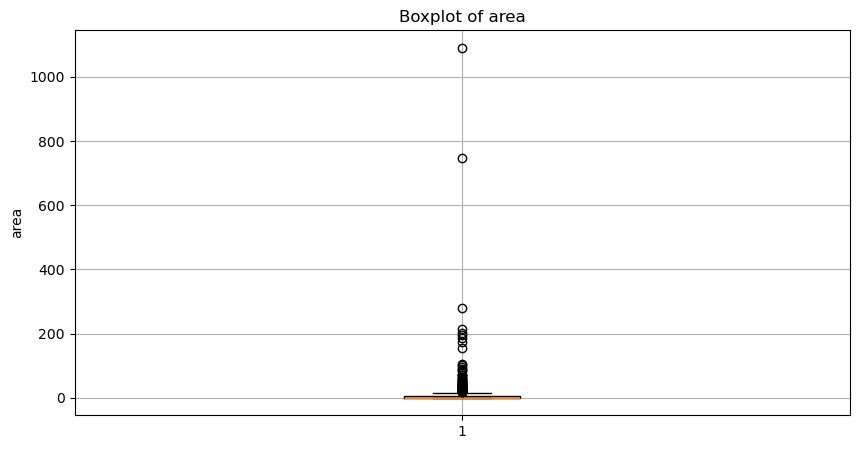

In [73]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'wind', 'area'
variables = ['wind', 'area']

for var in variables:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

### Wind Speed:

#### The median wind speed is around 4 km/h.
#### The interquartile range (IQR) for wind speed is roughly from 2 km/h to 6 km/h.
#### There are several outliers above 8 km/h, indicating that these wind speeds are relatively rare.

### Area Burned:

#### The median burned area is very small.
#### The IQR for the burned area is quite narrow, indicating that most fires result in small burned areas.
#### There are many outliers with much larger burned areas, extending up to around 1000 ha, which highlights the presence of significant fires that are much less common.

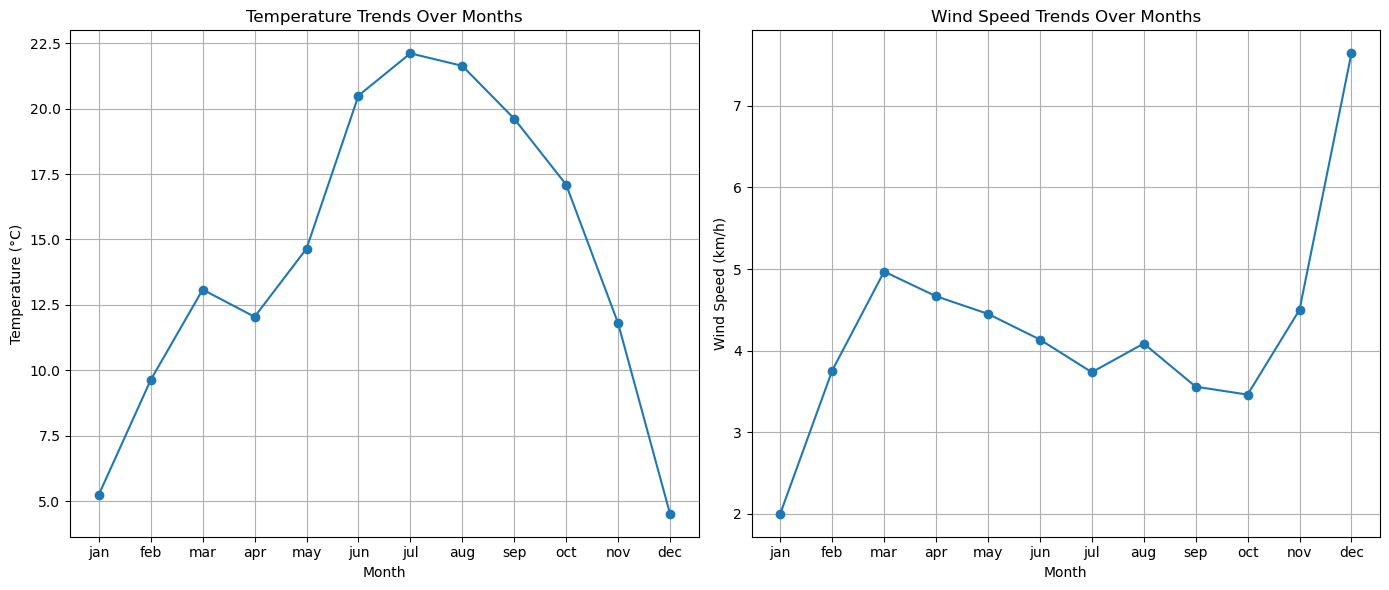

In [74]:
# Convert the 'month' column to a categorical type with an ordered category for plotting
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Group by 'month' and calculate the mean for 'temp' and 'wind'
monthly_trends = df.groupby('month', observed=False).mean(numeric_only=True)[['temp', 'wind']]

# Plot the temperature and wind speed trends over months
plt.figure(figsize=(14, 6))

# Temperature trend over months
plt.subplot(1, 2, 1)
plt.plot(monthly_trends.index, monthly_trends['temp'], marker='o')
plt.title('Temperature Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Wind speed trend over months
plt.subplot(1, 2, 2)
plt.plot(monthly_trends.index, monthly_trends['wind'], marker='o')
plt.title('Wind Speed Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)

plt.tight_layout()
plt.show()

### Temperature Trends Over Months:

#### The temperature shows a clear seasonal trend.
#### Temperatures rise from January, peak during the summer months (June, July, August), and then decline towards December.
#### The peak temperature occurs in August, which aligns with the highest frequency of fires.

### Wind Speed Trends Over Months:

#### Wind speeds show some variation throughout the year but do not exhibit as strong a seasonal trend as temperature.
#### Wind speeds appear to be relatively higher during the summer months (June to August) and lower during the winter months.
#### There is a slight peak in wind speed around August.

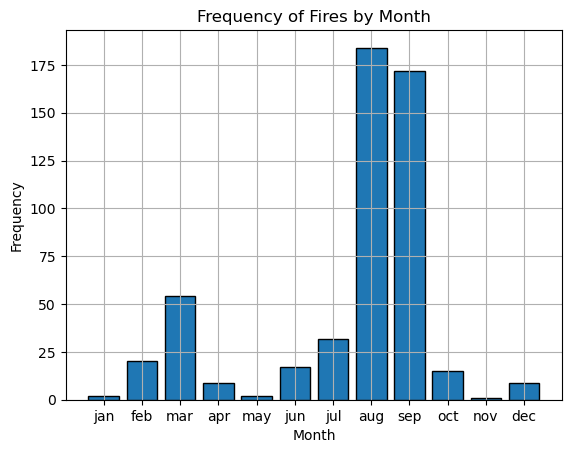

In [75]:
# Bar plot for Frequency of Fires by Month
month_counts = df['month'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values, edgecolor='black')
plt.title('Frequency of Fires by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Frequency of Fires by Month:

#### Fire occurrences are higher in the summer months (June, July, August, September), with a peak in August.
#### This seasonal pattern aligns with higher temperatures and lower humidity during these months.

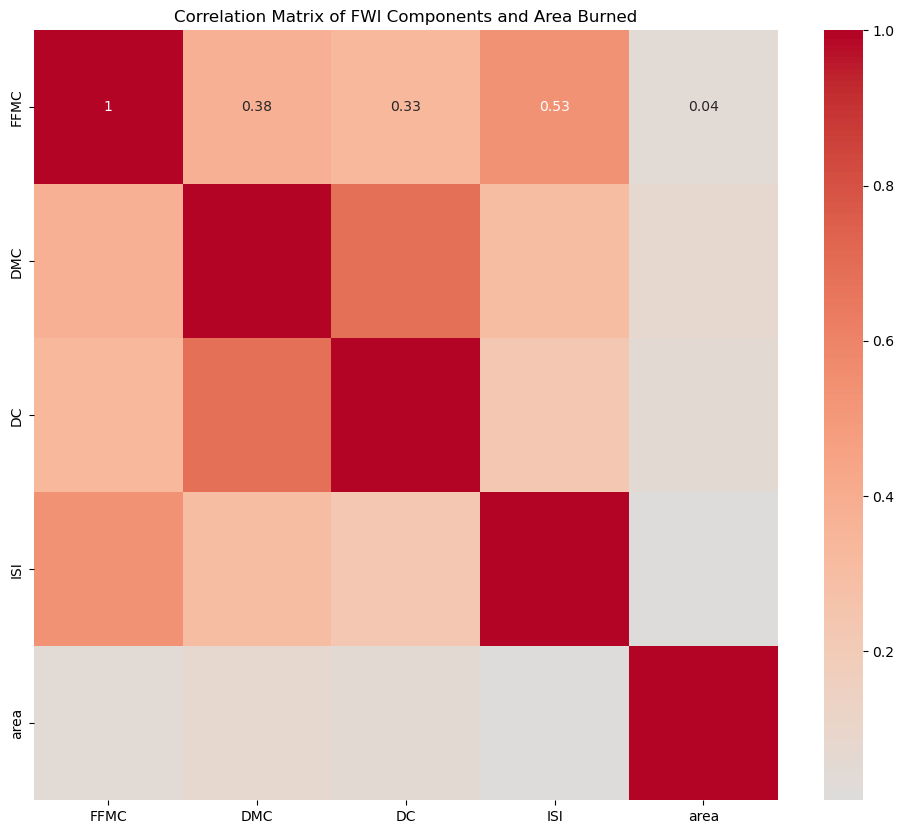

In [76]:
# Correlation Matrix
corr_matrix = df[['FFMC', 'DMC', 'DC', 'ISI', 'area']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of FWI Components and Area Burned')
plt.show()

#### All of the FWI variables display a weak positive correlation.
#### FFMC, DMC, DC, and ISI: These variables are more strongly correlated with each other.